<a href="https://colab.research.google.com/github/Shaadalam9/Shaadalam9/blob/main/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
x=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) 

In [7]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(1),
                           tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
34/34 [==============================] - 3s 2ms/step - loss: 8868.5928 - mae: 8868.5928
Epoch 2/50
34/34 [==============================] - 0s 2ms/step - loss: 7887.1597 - mae: 7887.1597
Epoch 3/50
34/34 [==============================] - 0s 2ms/step - loss: 7537.0942 - mae: 7537.0942
Epoch 4/50
34/34 [==============================] - 0s 3ms/step - loss: 7859.4336 - mae: 7859.4336
Epoch 5/50
34/34 [==============================] - 0s 3ms/step - loss: 7639.6704 - mae: 7639.6704
Epoch 6/50
34/34 [==============================] - 0s 3ms/step - loss: 7578.0845 - mae: 7578.0845
Epoch 7/50
34/34 [==============================] - 0s 3ms/step - loss: 7514.6162 - mae: 7514.6162
Epoch 8/50
34/34 [==============================] - 0s 3ms/step - loss: 7694.1338 - mae: 7694.1338
Epoch 9/50
34/34 [==============================] - 0s 3ms/step - loss: 7595.9116 - mae: 7595.9116
Epoch 10/50
34/34 [==============================] - 0s 3ms/step - loss: 7735.9116 - mae: 7735.9116
Epoch 11/

In [8]:
model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8374.4414 - mae: 8374.4414


[8374.44140625, 8374.44140625]

In [11]:
model_2=tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
history=model_2.fit(x_train,y_train,epochs=50)

Epoch 1/50
34/34 [==============================] - 1s 3ms/step - loss: 13197.8926 - mae: 13197.8926
Epoch 2/50
34/34 [==============================] - 0s 3ms/step - loss: 12469.8154 - mae: 12469.8154
Epoch 3/50
34/34 [==============================] - 0s 3ms/step - loss: 10440.8271 - mae: 10440.8271
Epoch 4/50
34/34 [==============================] - 0s 3ms/step - loss: 7877.2432 - mae: 7877.2432
Epoch 5/50
34/34 [==============================] - 0s 3ms/step - loss: 7443.4990 - mae: 7443.4990
Epoch 6/50
34/34 [==============================] - 0s 3ms/step - loss: 7395.1494 - mae: 7395.1494
Epoch 7/50
34/34 [==============================] - 0s 3ms/step - loss: 7343.1528 - mae: 7343.1528
Epoch 8/50
34/34 [==============================] - 0s 3ms/step - loss: 7301.9131 - mae: 7301.9131
Epoch 9/50
34/34 [==============================] - 0s 4ms/step - loss: 7259.3877 - mae: 7259.3877
Epoch 10/50
34/34 [==============================] - 0s 4ms/step - loss: 7217.2563 - mae: 7217.2563
Epo

In [12]:
model_2.evaluate(x_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 5307.3906 - mae: 5307.3906


[5307.390625, 5307.390625]

Text(0.5, 0, 'epochs')

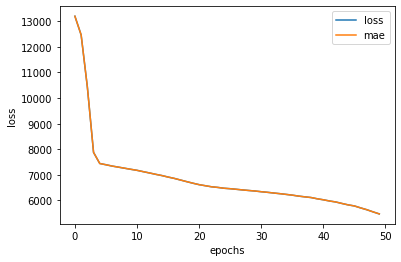

In [13]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [14]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import make_column_transformer
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)
x=insurance.drop("charges",axis=1)
y=insurance["charges"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) 
ct.fit(x_train)
x_train_normal=ct.transform(x_train)
x_test_normal=ct.transform(x_test)

In [16]:
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [19]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
model_3.fit(x_train_normal,y_train,epochs=50)

Epoch 1/50
34/34 [==============================] - 1s 3ms/step - loss: 13340.4238 - mae: 13340.4238
Epoch 2/50
34/34 [==============================] - 0s 3ms/step - loss: 13304.7188 - mae: 13304.7188
Epoch 3/50
34/34 [==============================] - 0s 3ms/step - loss: 13178.4893 - mae: 13178.4893
Epoch 4/50
34/34 [==============================] - 0s 3ms/step - loss: 12868.2773 - mae: 12868.2773
Epoch 5/50
34/34 [==============================] - 0s 3ms/step - loss: 12269.2334 - mae: 12269.2334
Epoch 6/50
34/34 [==============================] - 0s 3ms/step - loss: 11321.8965 - mae: 11321.8965
Epoch 7/50
34/34 [==============================] - 0s 3ms/step - loss: 10218.4590 - mae: 10218.4590
Epoch 8/50
34/34 [==============================] - 0s 3ms/step - loss: 9182.0332 - mae: 9182.0332
Epoch 9/50
34/34 [==============================] - 0s 3ms/step - loss: 8458.1787 - mae: 8458.1787
Epoch 10/50
34/34 [==============================] - 0s 3ms/step - loss: 8055.3774 - mae: 8055.

In [21]:
model_3.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3435.0044 - mae: 3435.0044


[3435.00439453125, 3435.00439453125]